In [1]:
from transformers import GPT2Tokenizer, GPT2Model
import torch
import numpy as np

# Load pre-trained GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')

# Function to get the word embeddings
def get_word_embedding(word):
    inputs = tokenizer(word, return_tensors="pt")
    outputs = model(**inputs, output_hidden_states=True)
    
    # Extract embeddings (mean of last hidden state)
    last_hidden_states = outputs.last_hidden_state
    embedding = torch.mean(last_hidden_states, dim=1).detach().numpy()
    return embedding

# Get embeddings for the words "son", "daughter", "father", "mother"
embedding_son = get_word_embedding("queen")
embedding_daughter = get_word_embedding("king")
embedding_father = get_word_embedding("man")
embedding_mother = get_word_embedding("woman")

/Users/jimmyzhang/Development/sae/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jimmyzhang/Development/sae/myenv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [2]:
embedding_dict.keys()

NameError: name 'embedding_dict' is not defined

In [95]:
# Step 3: Find the nearest neighbors
def get_nearest_neighbors(word, embeddings_dict, top_n=5):
    if word not in embeddings_dict:
        raise ValueError(f"{word} not found in the embeddings dictionary!")
    
    word_vector = embeddings_dict[word]
    similarities = {}
    
    for other_word, other_vector in embeddings_dict.items():
        if other_word != word:  # Skip the word itself
            similarity = cosine_similarity(word_vector, other_vector)
            similarities[other_word] = similarity
    
    # Sort words by similarity and return the top N
    nearest_neighbors = sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:top_n]
    
    return nearest_neighbors


In [105]:
get_nearest_neighbors("steak", embeddings_dict)

[('steaks', 0.75212365),
 ('sirloin', 0.64858186),
 ('grilled', 0.6387577),
 ('filet', 0.6274852),
 ('roast', 0.6086898)]

In [2]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2.T) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [3]:
def compare_word_pairs(pair1, pair2):
    word1, word2 = pair1
    word3, word4 = pair2
    
    # Get embeddings for each word
    embedding_word1 = get_word_embedding(word1)
    embedding_word2 = get_word_embedding(word2)
    embedding_word3 = get_word_embedding(word3)
    embedding_word4 = get_word_embedding(word4)
    
    # Calculate the difference vectors
    diff_pair1 = embedding_word1 - embedding_word2
    diff_pair2 = embedding_word3 - embedding_word4
    
    # Calculate cosine similarity between the two difference vectors
    similarity = cosine_similarity(diff_pair1, diff_pair2)
    
    return similarity

In [100]:
len([x for x in embeddings_dict.keys()])

400000

In [4]:
pairs = [
    (("king", "queen"), ("man", "woman")),
    (("brother", "sister"), ("uncle", "aunt")),
    (("prince", "princess"), ("hero", "heroine")),
    (("actor", "actress"), ("waiter", "waitress")),
    (("boy", "girl"), ("husband", "wife"))
]

for pair1, pair2 in pairs:
    similarity = compare_word_pairs(pair1, pair2)
    print(f"Cosine similarity between {pair1} and {pair2}: {similarity}")

Cosine similarity between ('king', 'queen') and ('man', 'woman'): [[-0.279071]]
Cosine similarity between ('brother', 'sister') and ('uncle', 'aunt'): [[-0.07711112]]
Cosine similarity between ('prince', 'princess') and ('hero', 'heroine'): [[-0.4885704]]
Cosine similarity between ('actor', 'actress') and ('waiter', 'waitress'): [[-0.81067914]]
Cosine similarity between ('boy', 'girl') and ('husband', 'wife'): [[-0.5522906]]


In [5]:
pairs = [
    (("a", "b"), ("man", "woman")),
    (("brother", "sister"), ("uncle", "aunt")),
    (("prince", "princess"), ("hero", "heroine")),
    (("actor", "actress"), ("waiter", "waitress")),
    (("boy", "girl"), ("husband", "wife"))
]

In [6]:
# Function to calculate cosine similarity between two word embeddings
def cosine_similarity_word_pair(word1, word2):
    # Get embeddings for each word
    embedding_word1 = get_word_embedding(word1)
    embedding_word2 = get_word_embedding(word2)
    
    return cosine_similarity(embedding_word1, embedding_word2)

In [7]:
cosine_similarity_word_pair("fish", "water")

array([[0.99890697]], dtype=float32)

IndexError: index 120 is out of bounds for axis 0 with size 120

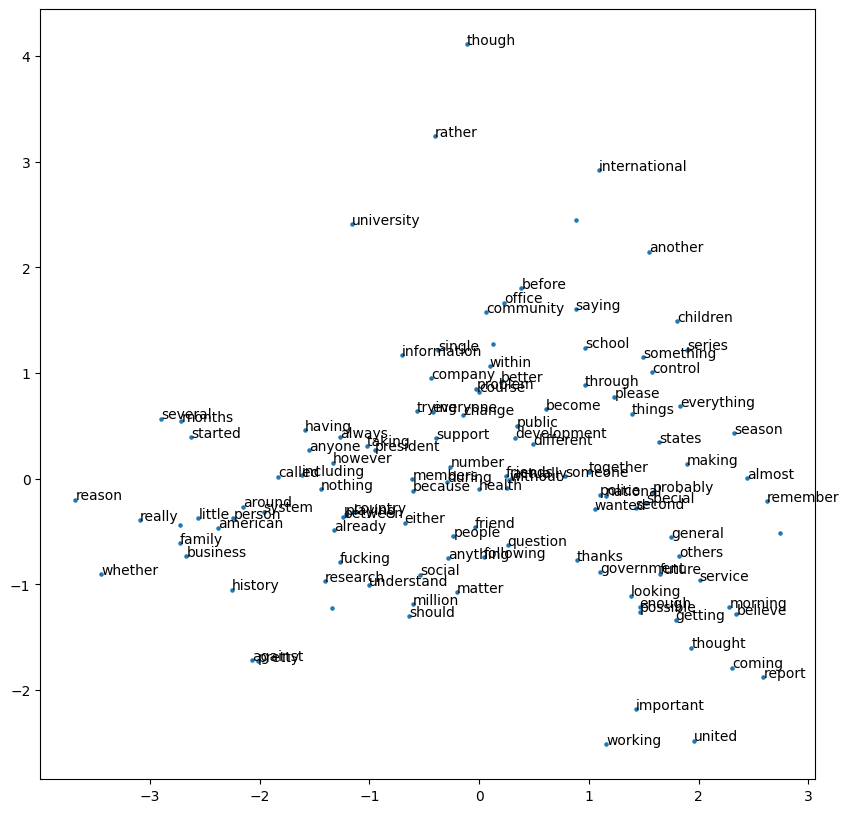

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to plot top n words using PCA
def plot_top_n_words_pca(embeddings_dict, n=100):
    """
    Plots the top n most frequent words from the word frequency dictionary using PCA on GloVe embeddings.
    
    :param embeddings_dict: Dictionary containing word embeddings, {word: embedding vector}
    :param word_freq_dict: Dictionary of word frequencies, {word: frequency}
    :param n: Number of top words to plot
    """
    # Sort the words by frequency and get the top n words
    # top_words = sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)[:n]
    
    # Extract embeddings for the top n words
    words = [word for word in top_words]
    embeddings = np.array([embeddings_dict[word] for word in words if word in embeddings_dict])

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    # Plot the words on a 2D PCA chart
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=5)

    # Annotate the words
    for i, word in enumerate(words):
        if word in embeddings_dict:
            plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title(f'Top {n} Words in 2D PCA Space')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

# Example usage
# embeddings_dict = load_your_glove_embeddings_here()
# word_freq_dict = load_your_word_frequencies_here()
plot_top_n_words_pca(embeddings_dict, n=100)

In [89]:
from wordfreq import top_n_list

# Get the top N words in English
top_words = [x for x in top_n_list('en', n=500)]

In [8]:
cosine_similarity_word_pair("king", "queen")

array([[0.982795]], dtype=float32)

In [ ]:
d

In [9]:
cosine_similarity_word_pair("mattress", "guava")

array([[0.9963254]], dtype=float32)

In [10]:
cosine_similarity_word_pair("apple", "Car")

array([[0.9946923]], dtype=float32)

In [11]:
# Function to get the raw embeddings directly from GPT-2's embedding layer
def get_raw_embedding(word):
    # Tokenize the word
    input_ids = tokenizer.encode(word, return_tensors="pt")
    
    # Get the embeddings directly from the embedding layer
    embedding_layer = model.get_input_embeddings()
    
    # Extract the embedding for the input token
    embedding = embedding_layer(input_ids).detach().numpy()
    
    # Return the first token's embedding (since GPT-2 may split words into multiple tokens)
    return embedding[0][0]

# Compare the cosine similarity of the raw embeddings
def cosine_similarity_word_pair_raw(word1, word2):
    embedding_word1 = get_raw_embedding(word1)
    embedding_word2 = get_raw_embedding(word2)
    
    # Calculate cosine similarity
    def cosine_similarity(vec1, vec2):
        return np.dot(vec1, vec2.T) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    
    return cosine_similarity(embedding_word1, embedding_word2)

# Example usage:
similarity = cosine_similarity_word_pair_raw("big", "large")
print(f"Cosine similarity between 'apple' and 'car': {similarity}")

Cosine similarity between 'apple' and 'car': 0.4524918794631958


In [16]:
from gensim.models import KeyedVectors

# Path to your GloVe file (adjust this to the actual path where you've unzipped the file)
glove_file_path = '~/Downloads/glove.6B/glove.6B.100d.txt'

# Load GloVe vectors using Gensim
glove_vectors = KeyedVectors.load_word2vec_format(glove_file_path, binary=False, no_header=True)

# Function to calculate cosine similarity using GloVe embeddings
def glove_cosine_similarity(word1, word2):
    vector1 = glove_vectors[word1]
    vector2 = glove_vectors[word2]
    
    def cosine_similarity(vec1, vec2):
        return np.dot(vec1, vec2.T) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    
    return cosine_similarity(vector1, vector2)

# Example usage:
similarity = glove_cosine_similarity("apple", "car")
print(f"Cosine similarity between 'apple' and 'car': {similarity}")

Cosine similarity between 'apple' and 'car': 0.27095580101013184


In [19]:
print(glove_cosine_similarity("happy", "joyful"))


0.5259977


In [21]:
print(glove_vectors["king"])
print(glove_vectors["queen"])

[-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.41394  -1.3363   -0.61915  -0.33089  -0.52881
  0.16483  -0.98878

In [31]:
cosine_similarity(glove_vectors["waiter"] - glove_vectors["waitress"], glove_vectors["actor"] - glove_vectors["actress"])

0.43040922

In [23]:
import numpy as np

# Load GloVe embeddings
def load_glove_embeddings(glove_file_path):
    embeddings_dict = {}
    with open(glove_file_path, 'r', encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    return embeddings_dict

# Load the GloVe file (e.g., 100D or 300D)
glove_file_path = "/Users/jimmyzhang/Downloads/glove.6B/glove.6B.50d.txt"  # Adjust the path
embeddings_dict = load_glove_embeddings(glove_file_path)

In [50]:
# Example: Choose the first 5000 words from the GloVe embeddings
words = ["man", "woman", "king", "queen", "waiter", "waitress", "actor", "actress", "aunt", "uncle"]
embedding_matrix = np.array([embeddings_dict[word] for word in words])

In [24]:
import treescope
treescope.render_array(embeddings_dict['king'])
# treescope.render_array(embeddings_dict['queen'])

<Arrayviz rendering>

In [33]:
from gensim.models import Word2Vec


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [32]:
embeddings_dict['guava']

array([ 0.14111 , -0.65762 , -0.94811 ,  1.6702  ,  0.3359  ,  0.38575 ,
       -0.11815 , -0.65011 ,  0.077518,  0.85565 , -0.074327,  0.34654 ,
        1.0051  , -0.73667 , -0.12787 , -0.55671 , -0.55056 ,  0.90012 ,
        1.0166  , -0.85745 , -0.6065  , -0.52383 ,  0.81092 ,  0.092987,
        0.39733 ,  1.6064  ,  0.11208 ,  0.55908 ,  0.69487 , -0.87144 ,
        0.55147 , -0.49586 , -0.51199 ,  1.334   ,  0.27014 ,  0.32771 ,
       -1.0535  , -0.39801 ,  0.75706 ,  0.097444, -0.31769 , -0.34074 ,
       -1.2412  , -0.65919 ,  0.86885 ,  0.53882 ,  0.13009 , -0.92437 ,
        0.52931 , -0.71027 ], dtype=float32)

In [29]:
treescope.render_array(embeddings_dict['prince'])


<Arrayviz rendering>

In [25]:
treescope.render_array(embeddings_dict['queen'])

<Arrayviz rendering>

In [26]:
treescope.render_array(embeddings_dict['test'])

<Arrayviz rendering>

In [28]:
treescope.render_array(embeddings_dict['dog'])

<Arrayviz rendering>

In [27]:
treescope.render_array(embeddings_dict['guava'])

<Arrayviz rendering>

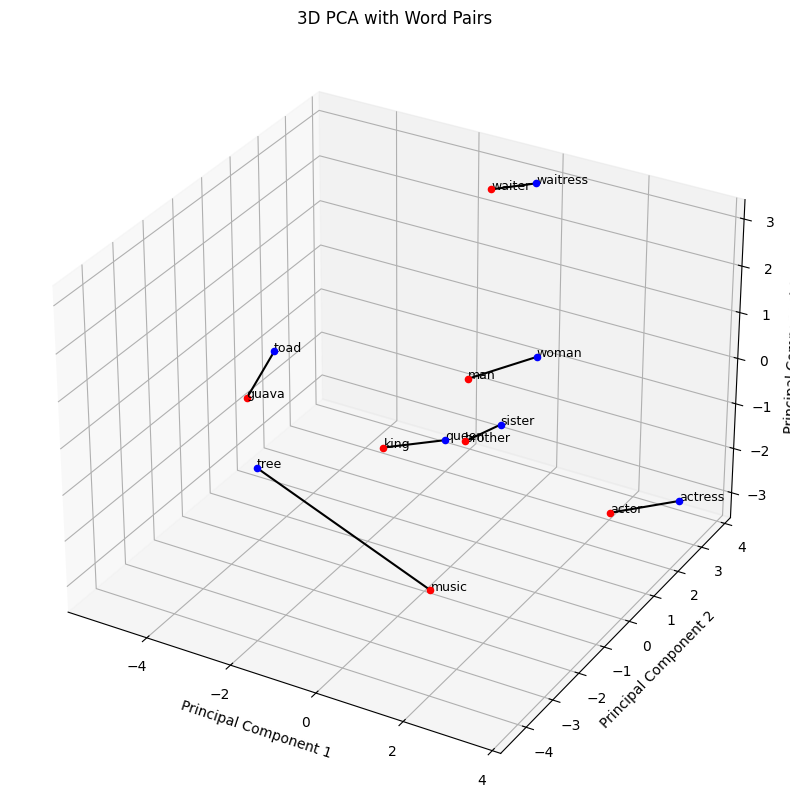

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot word pairs and draw lines between them
def plot_word_pairs_3d(embedding_matrix, word_pairs):
    # Apply PCA to reduce to 3 dimensions
    pca = PCA(n_components=3)
    reduced_embeddings = pca.fit_transform(embedding_matrix)

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Iterate over the word pairs
    for pair in word_pairs:
        word1, word2 = pair
        idx1 = flattened_words.index(word1)  # Get the index of the first word
        idx2 = flattened_words.index(word2)  # Get the index of the second word

        # Get the PCA-reduced coordinates of the words
        x1, y1, z1 = reduced_embeddings[idx1]
        x2, y2, z2 = reduced_embeddings[idx2]

        # Plot the points for the words
        ax.scatter(x1, y1, z1, c='r', marker='o', label=word1)
        ax.scatter(x2, y2, z2, c='b', marker='o', label=word2)

        # Annotate the words
        ax.text(x1, y1, z1, word1, fontsize=9)
        ax.text(x2, y2, z2, word2, fontsize=9)

        # Draw a line between the words in the pair
        ax.plot([x1, x2], [y1, y2], [z1, z2], 'k-')

    # Set axis labels and title
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA with Word Pairs')

    # Show the plot
    plt.show()

# Example usage:
word_pairs = [("king", "queen"), ("man", "woman"), ("brother", "sister"), ("waiter", "waitress"), ("actor", "actress"), ("guava", "toad"), ("music", "tree")]
flattened_words = [word for pair in word_pairs for word in pair]

embedding_matrix = np.array([embeddings_dict[word] for word in flattened_words])
plot_word_pairs_3d(embedding_matrix, word_pairs)

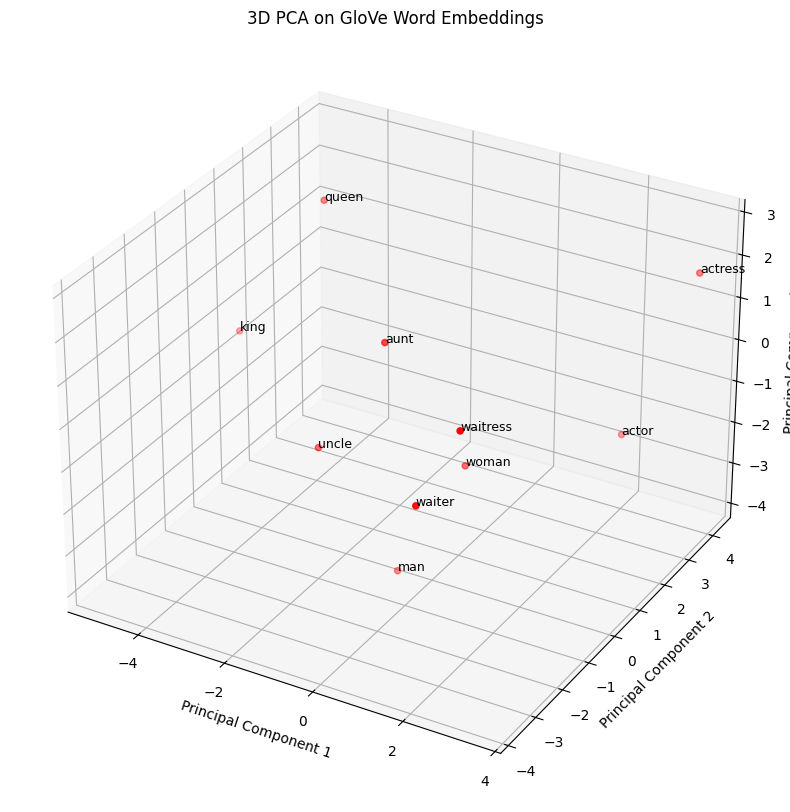

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Create a 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Extract the three principal components
x = reduced_embeddings[:, 0]
y = reduced_embeddings[:, 1]
z = reduced_embeddings[:, 2]

# Plot the points
ax.scatter(x, y, z, c='r', marker='o')

# Optionally, annotate some words
for i, word in enumerate(words[:100]):  # Annotate only first 100 words for readability
    ax.text(x[i], y[i], z[i], word, fontsize=9)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA on GloVe Word Embeddings')

# Show the plot
plt.show()